<a href="https://colab.research.google.com/github/microprediction/timeseries-notebooks/blob/main/tdigest_composition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install tdigest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import sys
sys.version

'3.7.14 (default, Sep  8 2022, 00:06:44) \n[GCC 7.5.0]'

In [1]:
USE_HACK = True

from tdigest import TDigest
import numpy as np 
data = [1,2,3,4,5,6]*5000
if USE_HACK:
  data = [ d+np.random.randn()*0.00000001 for d in data]
t = TDigest()
t.batch_update(data)
t.percentile(1/6)
t.cdf(1.2)

0.16607666663540696

In [13]:
import numpy as np 

def perc_plot(t):
  xs = np.linspace(0.5,99.5,100)
  print(xs)
  ys = [ t.percentile(x) for x in xs ]
  print(ys)
  import matplotlib.pyplot as plt
  plt.plot(xs,ys,'g+')

def cdf_plot(t):
  xs = np.linspace(0,7,100)
  ys = [ t.cdf(x) for x in xs ]
  print(list(zip(xs,ys)))
  import matplotlib.pyplot as plt
  plt.plot(xs,ys,'g+')

In [51]:
import scipy
from scipy.stats import norm


def transform(t, x, tol=1e-16):
    p = t.cdf(x)
    if p<tol:
       p = tol
    if p>1-tol:
       p = 1-tol
    y = norm.ppf(p)
    if np.isnan(y):
      print({'x':x,'p':p,'y':y})
    return y



In [60]:
from tdigest import TDigest
import numpy as np 
s = TDigest()
xs = np.linspace(1/50000,1-1/50000,50000)
s.batch_update( [ norm.ppf(x) for x in xs ] )

def stransform(x):
   return transform(s,x)

s

<T-Digest: n=50000, centroids=681>

[(-1.9839679358717444, -0.0016172067873345686), (-1.9438877755511026, 0.00023305045751742526), (-1.9038076152304608, -0.00023788657860501772), (-1.8637274549098208, 0.0003236383330755821), (-1.823647294589179, 0.00028525731007666977), (-1.7835671342685373, -0.00038769854905162937), (-1.7434869739478955, -0.00015127231591582913), (-1.7034068136272555, -0.00041978591113411845), (-1.6633266533066138, 0.00041322139807253855), (-1.623246492985972, 4.492101716380148e-05), (-1.5831663326653302, 0.00019014601924460806), (-1.5430861723446903, -0.0005015078874124335), (-1.5030060120240485, 4.91006075469258e-05), (-1.4629258517034067, 0.00023429814085274003), (-1.4228456913827667, 0.00023403370287877756), (-1.382765531062125, 0.0001932395289165889), (-1.3426853707414832, 0.00018539550430274332), (-1.3026052104208414, 0.0007750908930361788), (-1.2625250501002014, -0.00018393429583385412), (-1.2224448897795597, -0.00030575463317950025), (-1.182364729458918, -0.0008875500461615893), (-1.142284569138

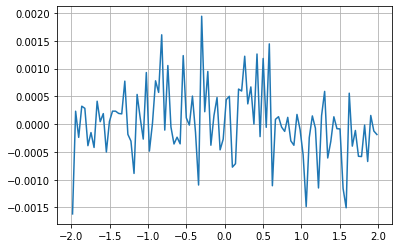

In [66]:
def plot_transform(f):
  xs = np.linspace(-10,10,500)
  ys = [ f(x) for x in xs]
  ds = [ x-y for x,y in zip(xs,ys)]

  print(list(zip(xs[200:-200],ds[200:-200])))
 
  import matplotlib.pyplot as plt
  plt.plot(xs[200:-200],ds[200:-200])
  plt.grid()

plot_transform(stransform)

<T-Digest: n=30000, centroids=705>